In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

In [2]:
data_path = './data'
df_paraclinial_raw = pd.read_excel(f'{data_path}/Ayudas_diagnosticas.xlsx', index_col=0).reset_index()
df_paraclinial_raw.head()

,Numero_Identificacion,Fecha_Orden,Manual_Proced_Desc,Result_Ayuda_Diag_Txt
0,417594,2019-08-05,Colesterol Total,145.0
1,423128,2019-11-26,Colesterol Total,235.0
2,423128,2019-05-16,Colesterol Total,199.0
3,423128,2018-06-28,Colesterol Total,256.0
4,423128,2017-12-22,Colesterol Total,226.0


In [3]:
df_paraclinial_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6871 entries, 0 to 6870
Data columns (total 4 columns):
Numero_Identificacion    6871 non-null int64
Fecha_Orden              6871 non-null datetime64[ns]
Manual_Proced_Desc       6871 non-null object
Result_Ayuda_Diag_Txt    6871 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 214.8+ KB


In [4]:
df_paraclinial_raw.columns = [col.lower() for col in df_paraclinial_raw.columns]
df_paraclinial_raw.rename(columns={
    'numero_identificacion': 'id_paciente',   
}, inplace=True)
df_paraclinial_raw.head()

,id_paciente,fecha_orden,manual_proced_desc,result_ayuda_diag_txt
0,417594,2019-08-05,Colesterol Total,145.0
1,423128,2019-11-26,Colesterol Total,235.0
2,423128,2019-05-16,Colesterol Total,199.0
3,423128,2018-06-28,Colesterol Total,256.0
4,423128,2017-12-22,Colesterol Total,226.0


In [5]:
df_paraclinial_raw.drop_duplicates(inplace=True)
df_paraclinial_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6861 entries, 0 to 6870
Data columns (total 4 columns):
id_paciente              6861 non-null int64
fecha_orden              6861 non-null datetime64[ns]
manual_proced_desc       6861 non-null object
result_ayuda_diag_txt    6861 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 268.0+ KB


In [6]:
df_paraclinial_raw['manual_proced_desc'].value_counts()

Hemoglobina                                                                   1201
Glucosa                                                                        811
Colesterol Total                                                               759
Colesterol Hdl                                                                 724
Trigliceridos                                                                  660
Tasa Filtracion Glomerular (Tfg Metodo Mdrd)                                   651
Linfocitos Totales                                                             631
Transaminasa Glutamico Oxalacetica O Aspartato Amino Transferasa [Tgo-Ast]     401
Transaminasa Glutamicopiruvica O Alanino Amino Transferasa [Tgp-Alt]           399
Hemoglobina Glicada (Hba1C)                                                    326
Colesterol Ldl                                                                  97
Tasa Filtración Glomerular (Tfg Método Mdrd)                                    92
Tran

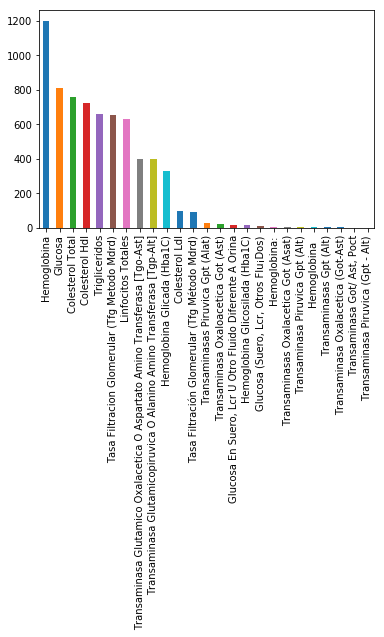

In [7]:
df_paraclinial_raw['manual_proced_desc'].value_counts().plot.bar()

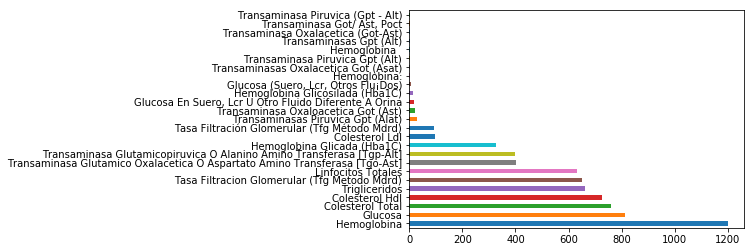

In [8]:
df_paraclinial_raw['manual_proced_desc'].value_counts().plot(kind='barh', x='Examenes de laboratorio')

In [9]:
df_paraclinial_raw['fecha_orden'].describe()

count                    6861
unique                    843
top       2020-01-24 00:00:00
freq                       45
first     2016-11-01 00:00:00
last      2020-05-11 00:00:00
Name: fecha_orden, dtype: object

In [10]:
len(df_paraclinial_raw['id_paciente'].unique())

996

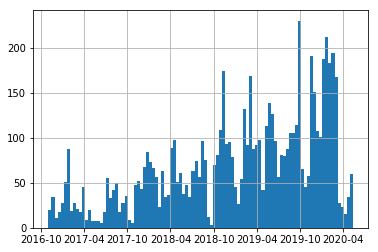

In [11]:
df_paraclinial_raw['fecha_orden'].hist(bins=100)

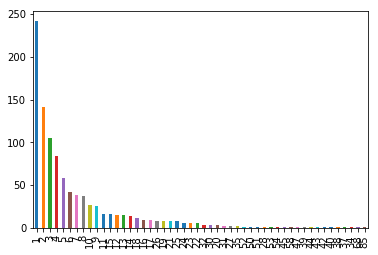

In [12]:
df_paraclinial_raw['id_paciente'].value_counts().value_counts().plot.bar()

In [13]:
df_paraclinial_raw['id_paciente'].value_counts().value_counts()

1     242
2     142
3     105
4      84
5      59
6      42
7      39
8      37
10     27
9      26
11     16
15     16
12     15
13     15
14     14
18     12
16      9
17      9
26      8
19      8
21      8
25      8
24      6
23      6
22      6
32      4
30      4
20      4
31      2
27      2
35      2
52      1
50      1
51      1
28      1
53      1
54      1
45      1
58      1
47      1
39      1
44      1
43      1
42      1
40      1
38      1
37      1
34      1
68      1
85      1
Name: id_paciente, dtype: int64

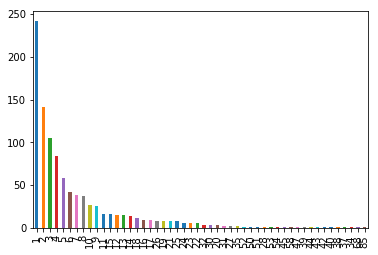

In [14]:
df_paraclinial_raw['id_paciente'].value_counts().value_counts().plot.bar()

In [15]:
df_paraclinial_raw[['id_paciente', 'fecha_orden', 'manual_proced_desc']].shape

(6861, 3)

In [16]:
df_paraclinial_raw[['id_paciente', 'fecha_orden', 'manual_proced_desc']].drop_duplicates().shape

(6845, 3)

In [17]:
df_paraclinial_raw.head()

,id_paciente,fecha_orden,manual_proced_desc,result_ayuda_diag_txt
0,417594,2019-08-05,Colesterol Total,145.0
1,423128,2019-11-26,Colesterol Total,235.0
2,423128,2019-05-16,Colesterol Total,199.0
3,423128,2018-06-28,Colesterol Total,256.0
4,423128,2017-12-22,Colesterol Total,226.0


In [19]:
df_paraclinial_raw.groupby(by=['id_paciente', 'fecha_orden', 'manual_proced_desc'], as_index=False).count().sort_values(by='result_ayuda_diag_txt',ascending=False)

,id_paciente,fecha_orden,manual_proced_desc,result_ayuda_diag_txt
110,524006,2018-02-03,Tasa Filtracion Glomerular (Tfg Metodo Mdrd),2
1694,952711,2020-01-10,Colesterol Hdl,2
228,537607,2019-09-23,Linfocitos Totales,2
1067,764376,2020-05-08,Colesterol Hdl,2
630,665012,2017-09-07,Colesterol Ldl,2
4034,1493731,2020-02-22,Colesterol Hdl,2
1131,780281,2020-03-16,Transaminasa Glutamico Oxalacetica O Aspartato...,2
3151,1277338,2017-12-07,Glucosa,2
1838,979640,2018-04-03,Colesterol Hdl,2
5669,1893592,2017-12-12,Hemoglobina,2


In [20]:
df_paraclinial_raw[df_paraclinial_raw['id_paciente'] == 979640]

,id_paciente,fecha_orden,manual_proced_desc,result_ayuda_diag_txt
1849,979640,2018-04-03,Trigliceridos,54.0
1850,979640,2018-04-03,Colesterol Hdl,3.0
1851,979640,2018-04-03,Colesterol Hdl,46.0
1852,979640,2018-04-03,Colesterol Ldl,92.2
1853,979640,2018-08-06,Glucosa,90.0
1854,979640,2018-04-03,Glucosa,79.0
1855,979640,2018-08-06,Transaminasa Glutamicopiruvica O Alanino Amino...,11.0
1856,979640,2018-04-03,Transaminasa Glutamicopiruvica O Alanino Amino...,11.0
1857,979640,2018-04-03,Transaminasa Glutamico Oxalacetica O Aspartato...,13.0
1858,979640,2018-04-03,Hemoglobina,13.1


In [21]:
df_paraclinial_raw[df_paraclinial_raw['id_paciente'] == 1759148]

,id_paciente,fecha_orden,manual_proced_desc,result_ayuda_diag_txt
5119,1759148,2020-02-04,Trigliceridos,145.30
5121,1759148,2020-02-04,Colesterol Hdl,30.70
5122,1759148,2020-02-04,Colesterol Hdl,7.00
5123,1759148,2020-02-04,Glucosa,94.90
5124,1759148,2020-02-05,Hemoglobina Glicada (Hba1C),5.97
5125,1759148,2020-02-04,Tasa Filtración Glomerular (Tfg Método Mdrd),77.28


In [22]:
df_paraclinial_raw[df_paraclinial_raw['id_paciente'] == 1690026]

,id_paciente,fecha_orden,manual_proced_desc,result_ayuda_diag_txt
4740,1690026,2020-02-10,Trigliceridos,116.3
4742,1690026,2019-10-01,Trigliceridos,117.5
4743,1690026,2018-12-27,Trigliceridos,143.0
4744,1690026,2018-10-08,Trigliceridos,211.6
4745,1690026,2018-04-19,Trigliceridos,120.4
4746,1690026,2020-02-10,Colesterol Hdl,61.4
4747,1690026,2019-10-01,Colesterol Hdl,62.2
4748,1690026,2018-12-27,Colesterol Hdl,57.8
4749,1690026,2018-10-08,Colesterol Hdl,52.7
4750,1690026,2018-04-19,Colesterol Hdl,65.3


In [23]:
df_paraclinial_raw.shape

(6861, 4)

In [24]:
df_paraclinial_raw.drop_duplicates().shape

(6861, 4)

## New CSV to load in DB


In [25]:
df_clean_paraclinical = df_paraclinial_raw.drop_duplicates().copy()

In [27]:
df_clean_paraclinical.shape

(6861, 4)

In [28]:
df_clean_paraclinical.rename(columns={
    'id_paciente': 'id_patient',
    'fecha_orden': 'order_date', 
    'manual_proced_desc':'procedure_name',
    'result_ayuda_diag_txt': 'result'
}, inplace=True)
df_clean_paraclinical.head()

,id_patient,order_date,procedure_name,result
0,417594,2019-08-05,Colesterol Total,145.0
1,423128,2019-11-26,Colesterol Total,235.0
2,423128,2019-05-16,Colesterol Total,199.0
3,423128,2018-06-28,Colesterol Total,256.0
4,423128,2017-12-22,Colesterol Total,226.0


In [29]:
df_clean_paraclinical.to_csv('./data/cleansed/paraclinical.csv')

In [30]:
df_clean_paraclinical[df_clean_paraclinical['id_patient'] == 99092316137]

,id_patient,order_date,procedure_name,result
6870,99092316137,2017-04-22,Colesterol Total,133.0
